# Introduction to Deep Learning in Python

> The fundamentals of neural networks and how to build deep learning models using Keras 2.0

- author: Victor Omondi
- toc: true
- comments: true
- categories: [deep-learning]

# Overview

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. We'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

# Libraries

In [1]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error


## Libraries Configuration

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

plt.style.use('fivethirtyeight')

# Basics of deep learning and neural networks

We'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. We'll build simple neural networks and generate predictions with them.

## Introduction to deeplearning

### Interactions

- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks
  - Text
  - Images
  - Videos
  - Audio
  - Source code


## Forward propagation

- Multiply - add process
- Dot product
- Forward propagation for one data point at a time
- Output is the prediction for that data point


### Forward propagation code

In [3]:
input_data = np.array([2,3])

weights = {
    'node_0': np.array([1, 1]),
    'node_1': np.array([-1, 1]),
    'output': np.array([2, -1])
}

node_0_value = (input_data*weights['node_0']).sum()
node_1_value = (input_data*weights['node_1']).sum()
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_values

array([5, 1])

In [4]:
output = (hidden_layer_values*weights['output']).sum()
output

9

## Activation functions


An "activation function" is a function applied at each node. It converts the node's input into some output.
* Applied to node inputs to produce node output

### ReLU (Rectied Linear Activation)

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

$$
\mbox{RELU}(x) = \left\{
    \begin{array} \\
        0 & \mbox{if} \ x<0 \\
        x & \mbox{if} \ x>=0
    \end{array}
\right.
$$

Here are some examples:
```python
relu(3) = 3
relu(-3) = 0
```

In [5]:
input_data = np.array([-1, 2])

weights = {
    'node_0': np.array([3, 3]),
    'node_1': np.array([1, 5]),
    'output': np.array([2, -1])
}

node_0_input = (input_data*weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_0_output

0.9950547536867305

In [6]:
node_1_input = (input_data*weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
node_1_output

0.999999969540041

In [7]:
hidden_layer_values = np.array([node_0_output, node_1_output])
hidden_layer_values

array([0.99505475, 0.99999997])

In [8]:
output = (hidden_layer_values*weights['output']).sum()
output

0.9901095378334199

In [9]:
def relu(input_data):
    '''This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.'''
    
    return(max(input_data, 0))




In [10]:
input_data = np.array([3, 5])
weights = {
    'node_0': np.array([2, 4]), 
    'node_1': np.array([ 4, -5]), 
    'output': np.array([2, 7])
}

# node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


## Deeper networks


### Representation learning
The model training process sets weights that determine the features/interactions in Neural Networks to optimize predictive accuracy.
The last layers capture the most complex interactions.
- Deep networks internally build representations of patterns in the data
- Partially replace the need for feature engineering
- Subsequent layers build increasingly sophisticated representationsof raw data


### Deep learning

- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions


### Multi-layer neural networks

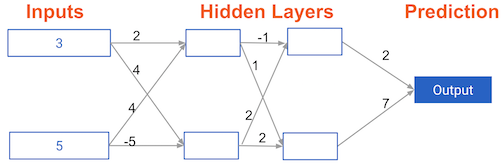

In [11]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * [2,4]).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data*[4, -5]).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs*[-1, 2]).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs*[1, 2]).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*[2,7]).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(np.array([3, 5]))
print(output)


182


The network generated a prediction of  `182` .

# Optimizing a neural network with backward propagation

Exploring how to optimize the predictions generated by neural networks. We'll use a method called backward propagation, which is one of the most important techniques in deep learning.

## The need for optimization

### Predictions with multiple points

- Making accurate predictions gets harder with more points
- At any set of weights, there are many values of the error
- ... corresponding to the many points we make predictions for

### Loss function

- Aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Lower loss function value means a better model
- Goal: Find the weights that give the lowest value for the loss function
- Gradient descent

### Gradient descent

### how weight changes affect accuracy

We'll get to change weights in a real network and see how they affect model accuracy!

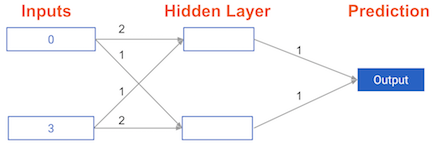

In [12]:
# The data point we will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# error
error_0 = model_output_0 - target_actual

# weights that cause the network to make perfect prediction (3)
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# error
error_1 = model_output_1 - target_actual

print(error_0)
print(error_1)


TypeError: predict_with_network() takes 1 positional argument but 2 were given

### Scaling up to multiple data points

We'll compare model accuracies for two different sets of weights, which have been stored as  `weights_0`  and  `weights_1`.

In [ ]:
weights_0 = {
    'node_0': np.array([2, 1]), 
    'node_1': np.array([1, 2]), 
    'output': np.array([1, 1])
}
weights_1 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1. , 1.5]),
    'output': np.array([1. , 1.5])
}

`input_data`  is a list of arrays. Each item in that list contains the data to make a single prediction.  `target_actuals`  is a list of numbers. Each item in that list is the actual value we are trying to predict.

In [ ]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals= [1, 3, 5, 7]

We'll use the  `mean_squared_error()`  function from  `sklearn.metrics` . It takes the true values and the predicted values as arguments.

In [ ]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [ ]:
model_output_0 = []
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

It looks like  `model_output_1`  has a higher mean squared error.

## Gradient descent


- If the slope is positive:
  - Going opposite the slope means moving to lower numbers
  - Subtract the slope from the current value
  - Too big a step might lead us astray
- Solution: learning rate
  - Update each weight by subtracting learning rate * slope


### Slope calculation

When plotting the mean-squared error loss function against predictions, the slope is  `2 * x * (xb-y)` , or  `2 * input_data * error` . Note that  `x`  and  `b`  may have multiple numbers ( `x`  is a vector for each data point, and  `b`  is a vector). In this case, the output will also be a vector

To calculate the slope for a weight, need to multiply:
- Slope of the loss function w.r.t value at the node we feed into
- The value of the node that feeds into our weight
- Slope of the activation function w.r.t value we feed into

In [ ]:
weights = np.array([1,2])
input_data = np.array([3, 4])
target = 6
learning_rate = .01
preds = (weights*input_data).sum()
error = preds-target
error

In [ ]:
gradient = 2 * input_data * error
gradient

In [ ]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated*input_data).sum()
error_updated = preds_updated - target
error_updated

Updating the model weights did indeed decrease the error!

### Making multiple updates to weights

We're now going to make multiple updates to dramatically improve model weights, and see how the predictions improve with each update.

`get_slope()`  function that takes  `input_data` ,  `target` , and  `weights`  as arguments.

In [ ]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

In [ ]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

`get_mse()`  function that takes the same arguments. The  `input_data` ,  `target` , and  `weights`

In [ ]:
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that  `weights`  is a single array.

In [ ]:
input_data = np.array([1, 2, 3])
target = 0
weights = np.array([0, 2, 1])

In [ ]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - .01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

the mean squared error decreases as the number of iterations go up.

## Backpropagation


Each time you generate predictions using forward propagation, you update the weights using backward propagation.